# Post Analysis

**This notebook is used to analyze the different posts done during the communication campaign**

## Import libraries

In [27]:
# Import standard libraries
import os

In [28]:
# Import librairies for data analysis and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [29]:
# Import internal modules
from src import plot
from src import utility
from src import features

## Upload data

In [30]:
# Specifiy here the path your data and image folder
DATA_PATH = f'{os.getcwd()}/data'
IMG_PATH = f'{os.getcwd()}/img'

In [31]:
# Specifiy here the name of the file you want to use for this analysis
POST_FILE = 'instagram-posts_2023-08-07_2023-09-15.csv'
REEL_FILE = 'instagram-reels_2023-08-07_2023-09-15.csv'
STORY_FILE = 'instagram-stories_2023-08-07_2023-09-15.csv'

In [32]:
# Upload the data and put date as index (rows are sorted by date) for Intsagram
df1 = utility.read_file(POST_FILE, date_col='Timestamp', data_path=DATA_PATH)
df2 = utility.read_file(REEL_FILE, date_col='Date', data_path=DATA_PATH)
df3 = utility.read_file(STORY_FILE, date_col='Timestamp', data_path=DATA_PATH)

In [33]:
# Upload the data and put date as index (rows are sorted by date) for Facebook
df4 = utility.read_file('FACEBOOKDatas23.csv', date_col='Date', data_path=DATA_PATH)

In [34]:
# Put the dataframe in a dictionnary (used to apply functions to the different dataset in parallel)
dfs_dict = {'post':df1, 'reel':df2, 'story':df3}

## Add features

In [35]:
# Set the numero of post for each publication
features.set_publication_numero(dfs_dict)

In [36]:
# Count the number of characters for each publication
features.count_content_length(dfs_dict)

In [37]:
# Count the time between the actual and the last publication
features.time_since_last_publication(dfs_dict)

In [38]:
# Add an URL column to have a primary key for each dataset
df3['URL'] = df3['Post URL']
df4['URL'] = df4['PostLink']

## Process data

In [39]:
## Concat the different dataframe into a single one
df = pd.concat([df1,df2,df3], axis=0)
# Sort by dates
df.sort_index(inplace=True)

In [40]:
# Put the dataframe in a dictionnary (used to apply functions to the different dataset in parallel)
df_dict = {'Instagram':df,
           'Facebook':df4}

In [41]:
# Put the dataframe in a dictionnary (used to apply functions to the different dataset in parallel)

facebook_dict = {'Before':df4[:'2023-08-07 00:00:00'],
                 'After':df4['2023-08-07 00:00:00':]}

In [42]:
# Set the numero for each publication
features.set_publication_numero(df_dict)
# Count the time between the actual and the last publication
features.time_since_last_publication(df_dict)

## Explore

In [43]:
col = 'Reach (Organic)'

No handles with labels found to put in legend.


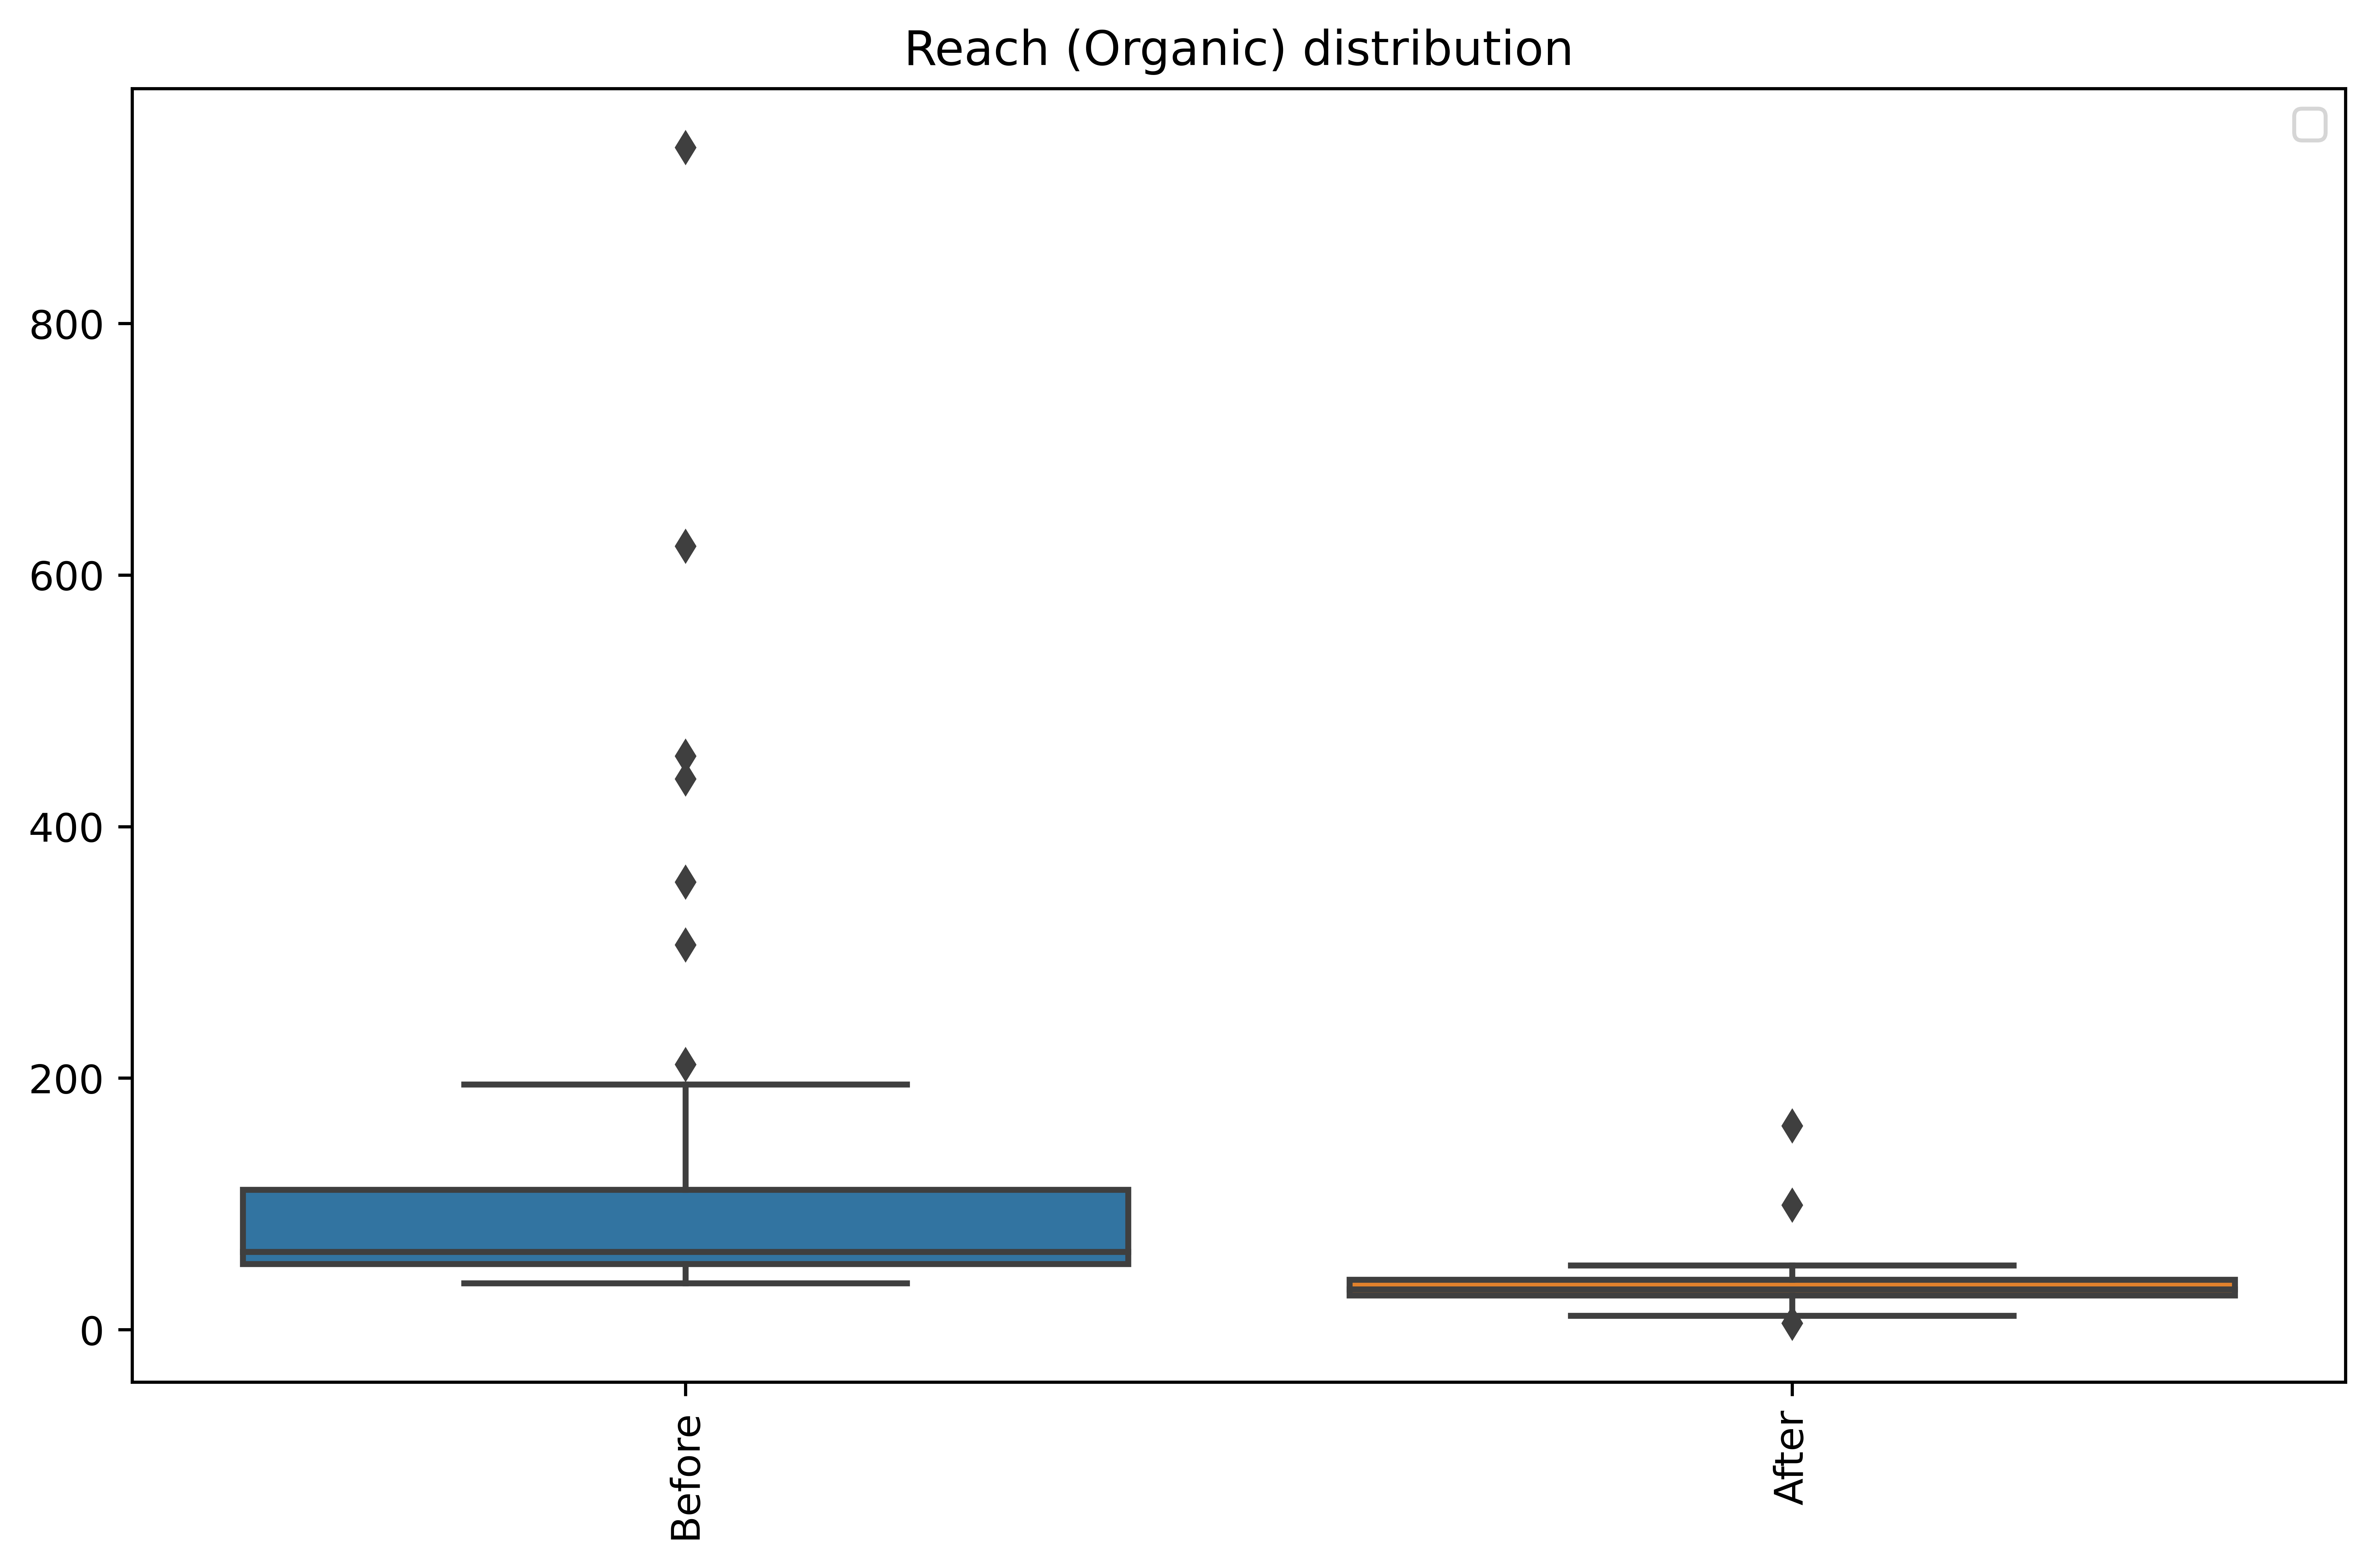

In [44]:
plot.mean_plot(facebook_dict, col, save_img_path=f'{IMG_PATH}')

KeyError: 'publication_number'

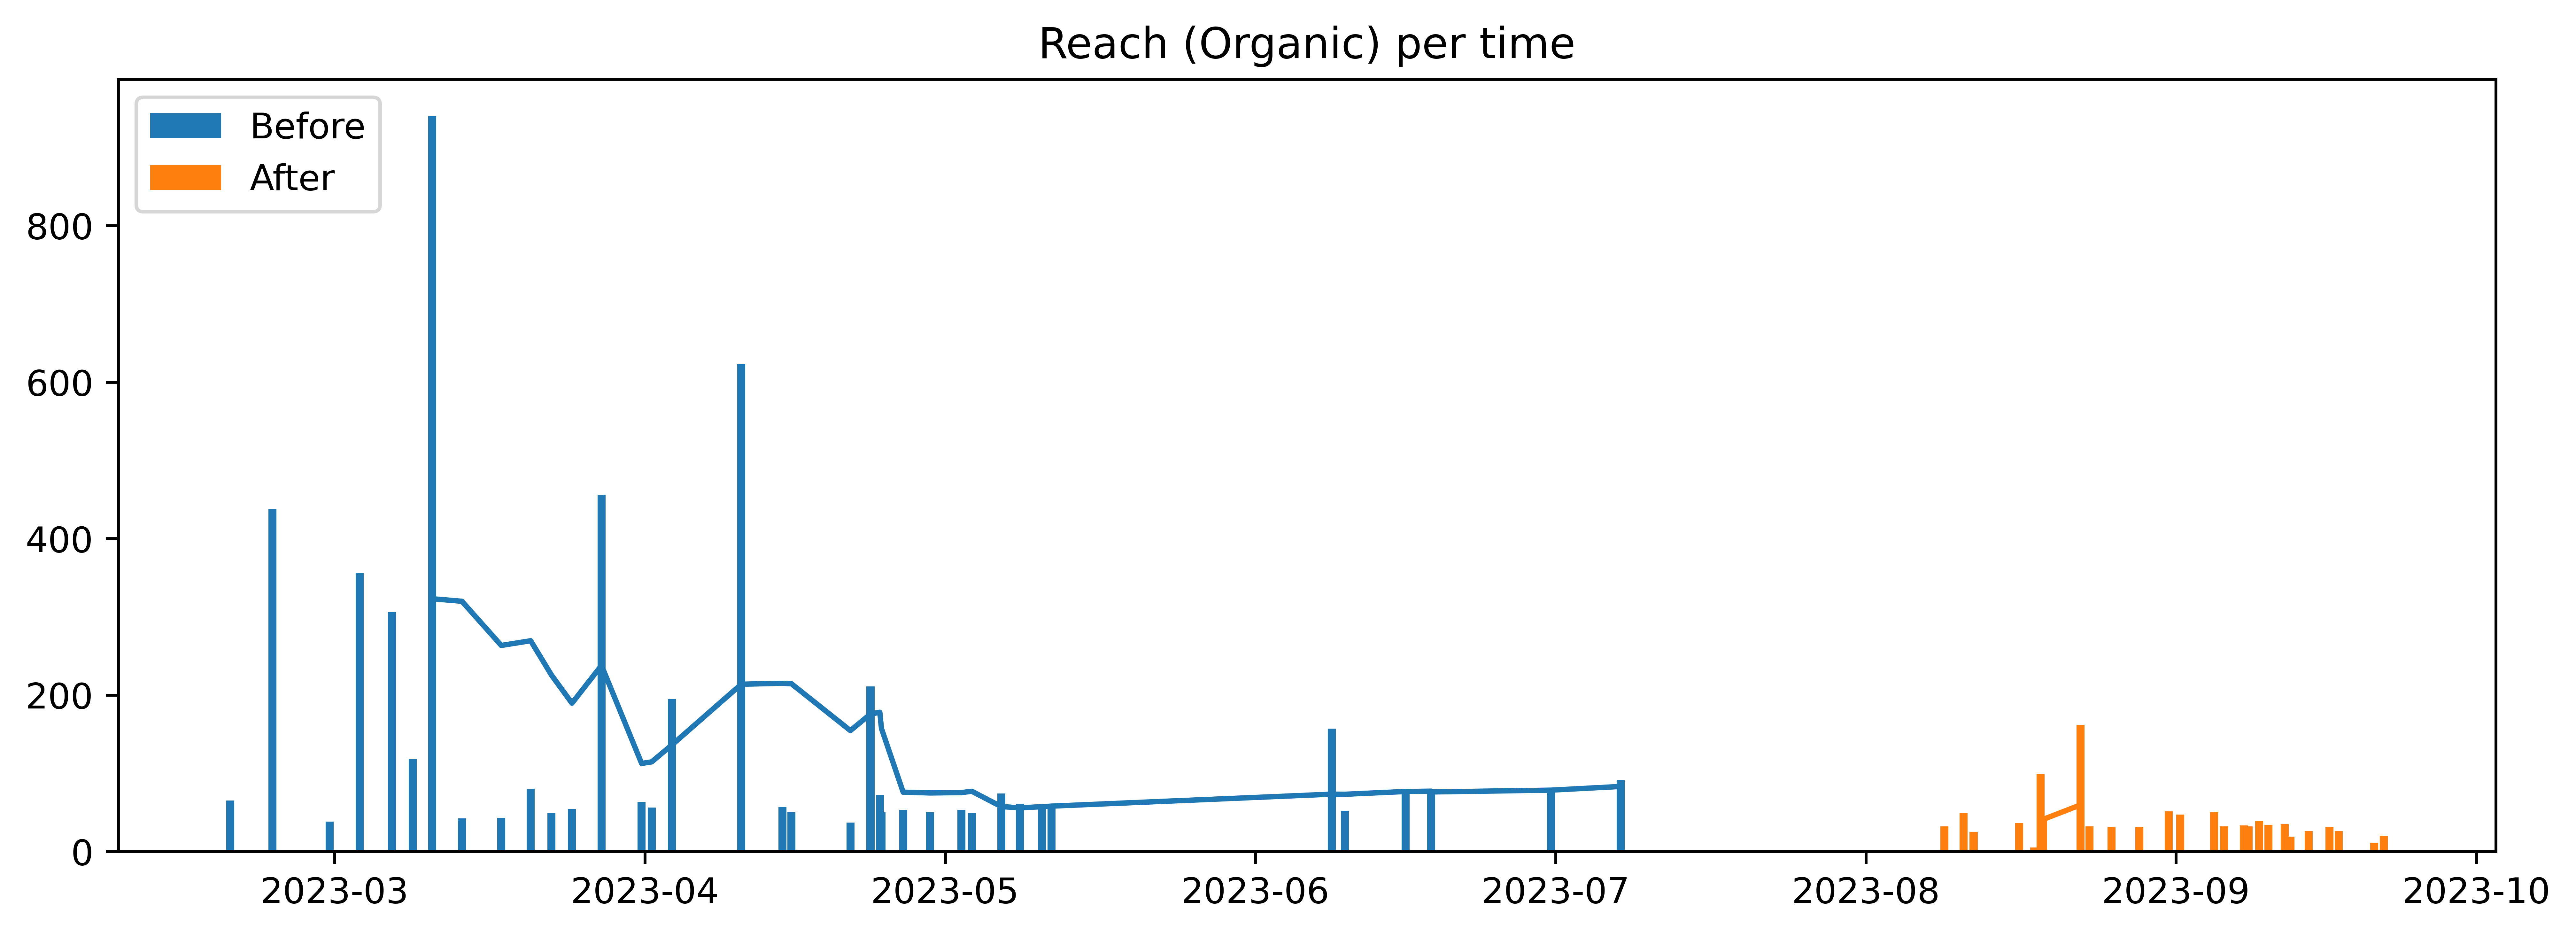

<Figure size 9600x3200 with 0 Axes>

In [45]:
# Plot different graph, allowing an analysis of the Reach during the communication campaign
plot.plot_chain(facebook_dict, 'Reach (Organic)', save_img_path=f'{IMG_PATH}/Reach')

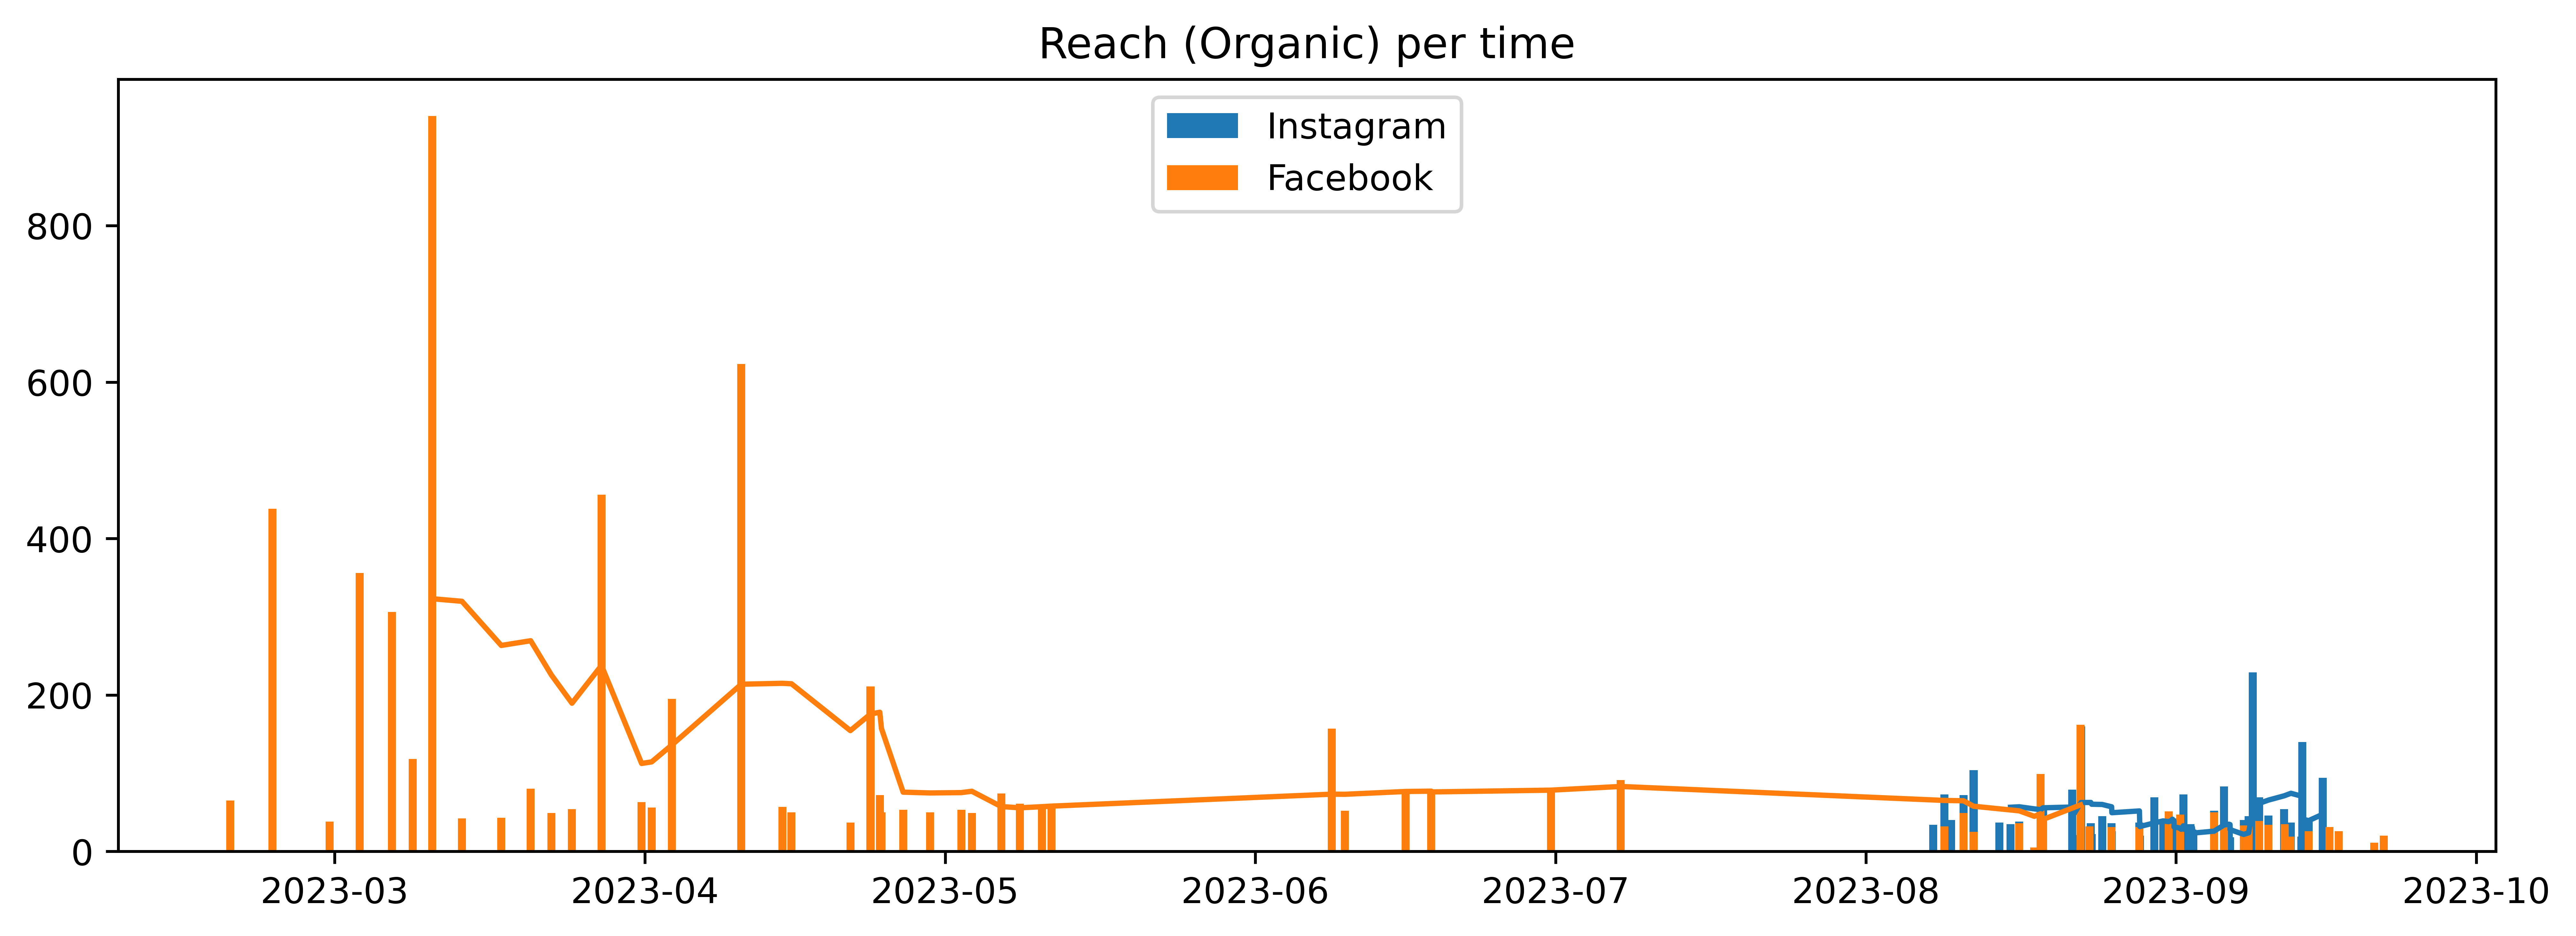

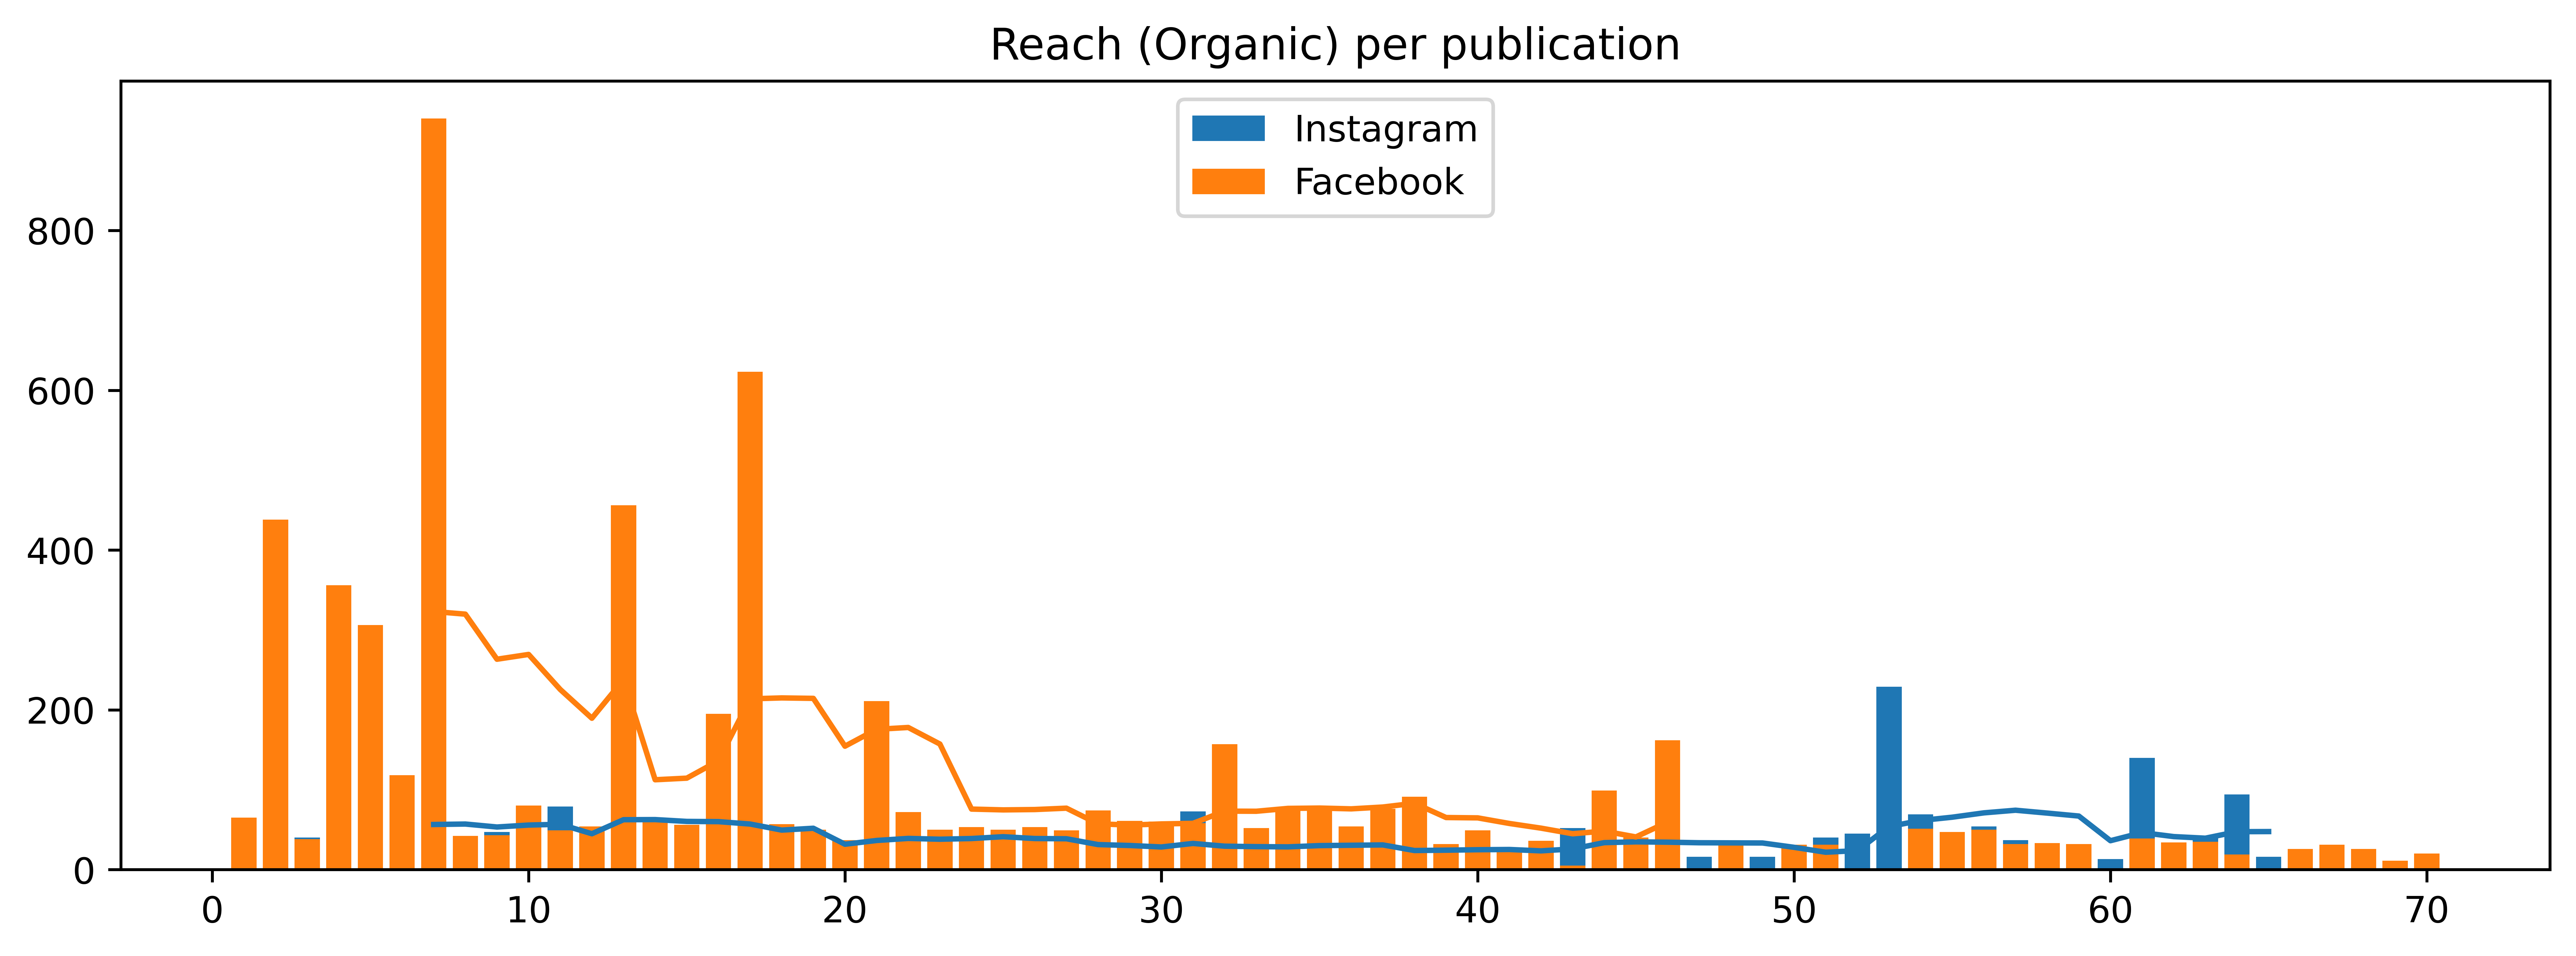

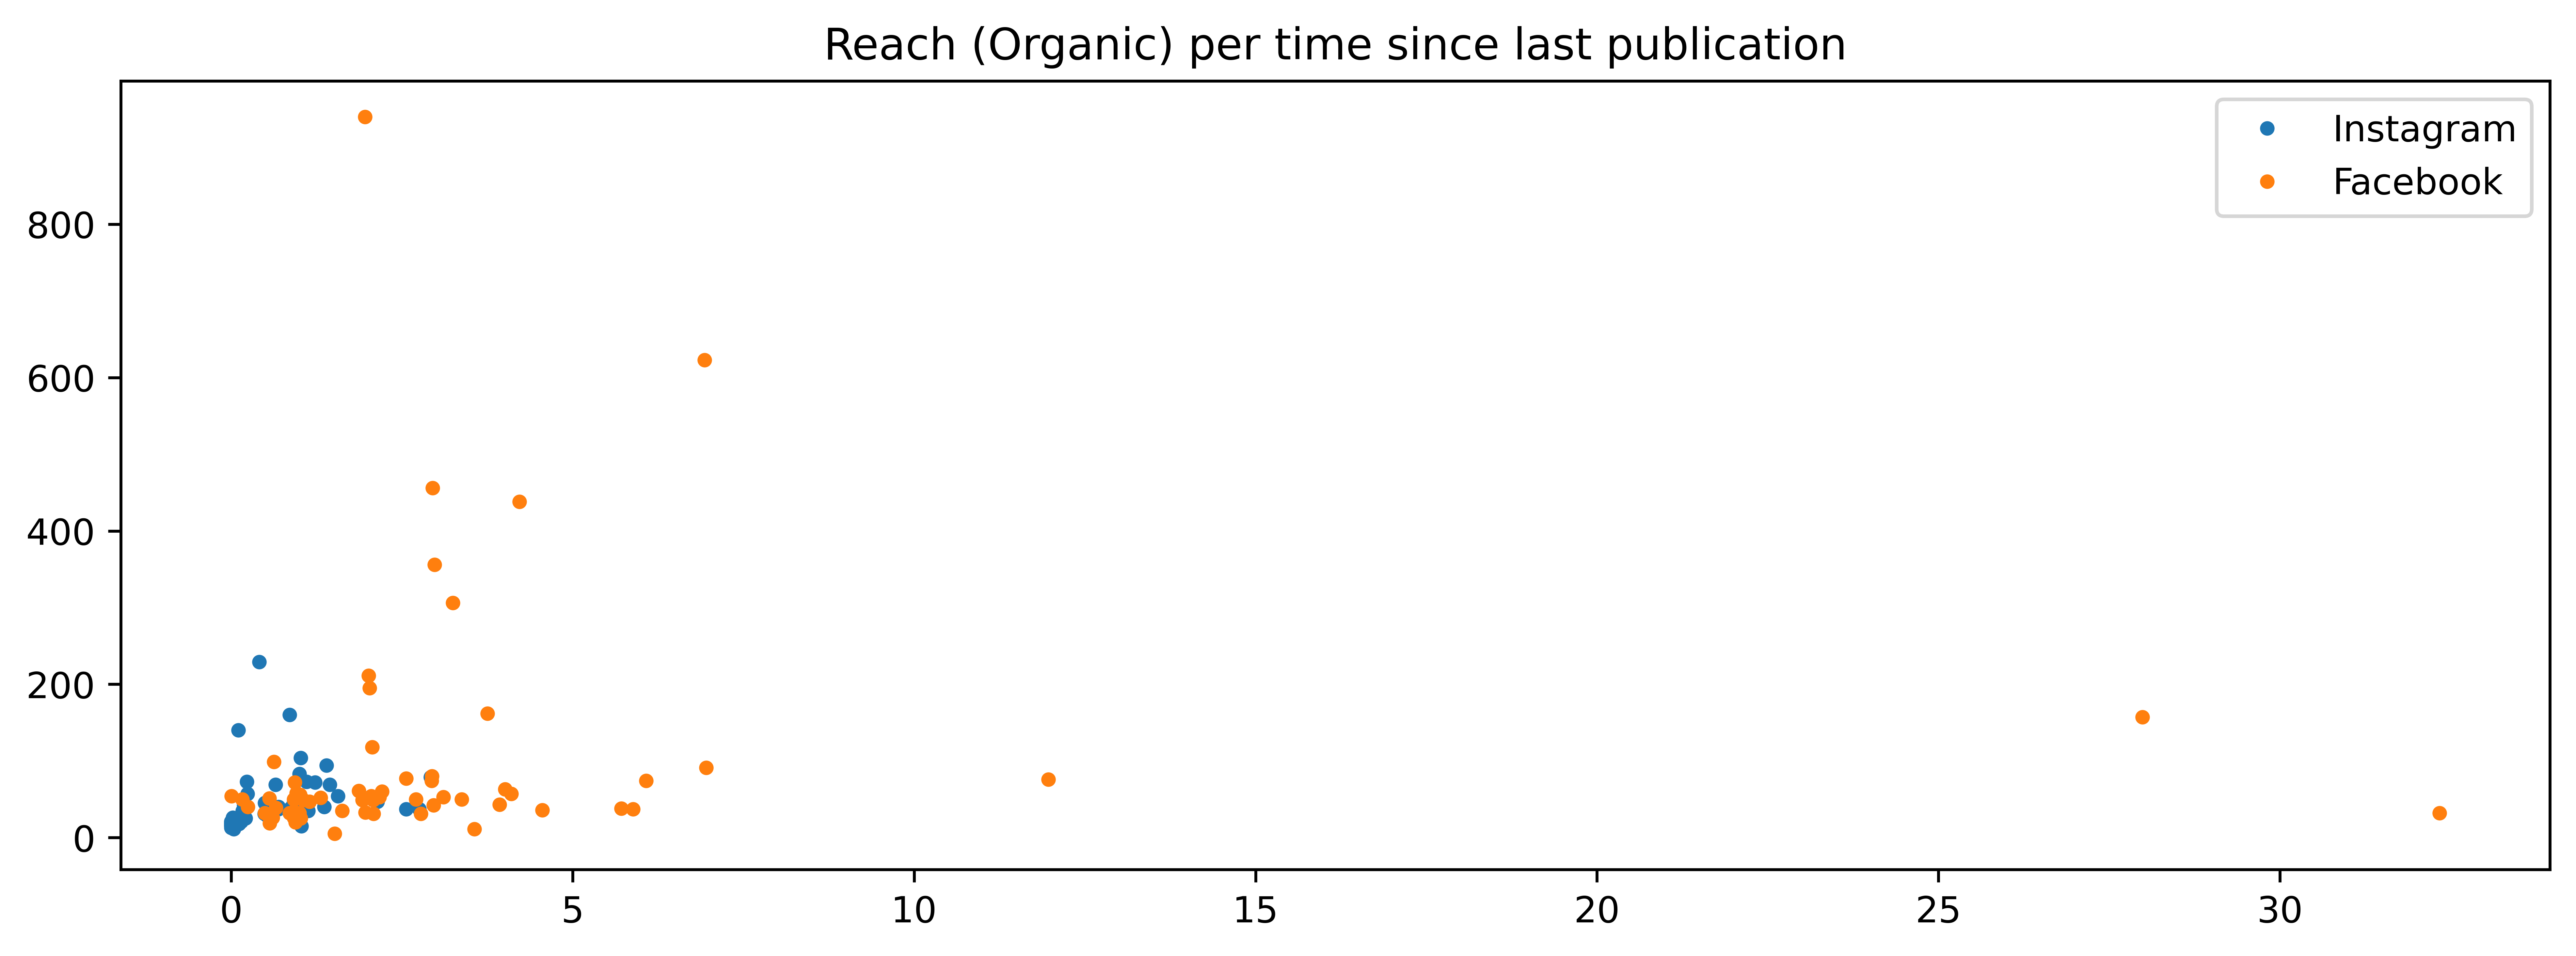

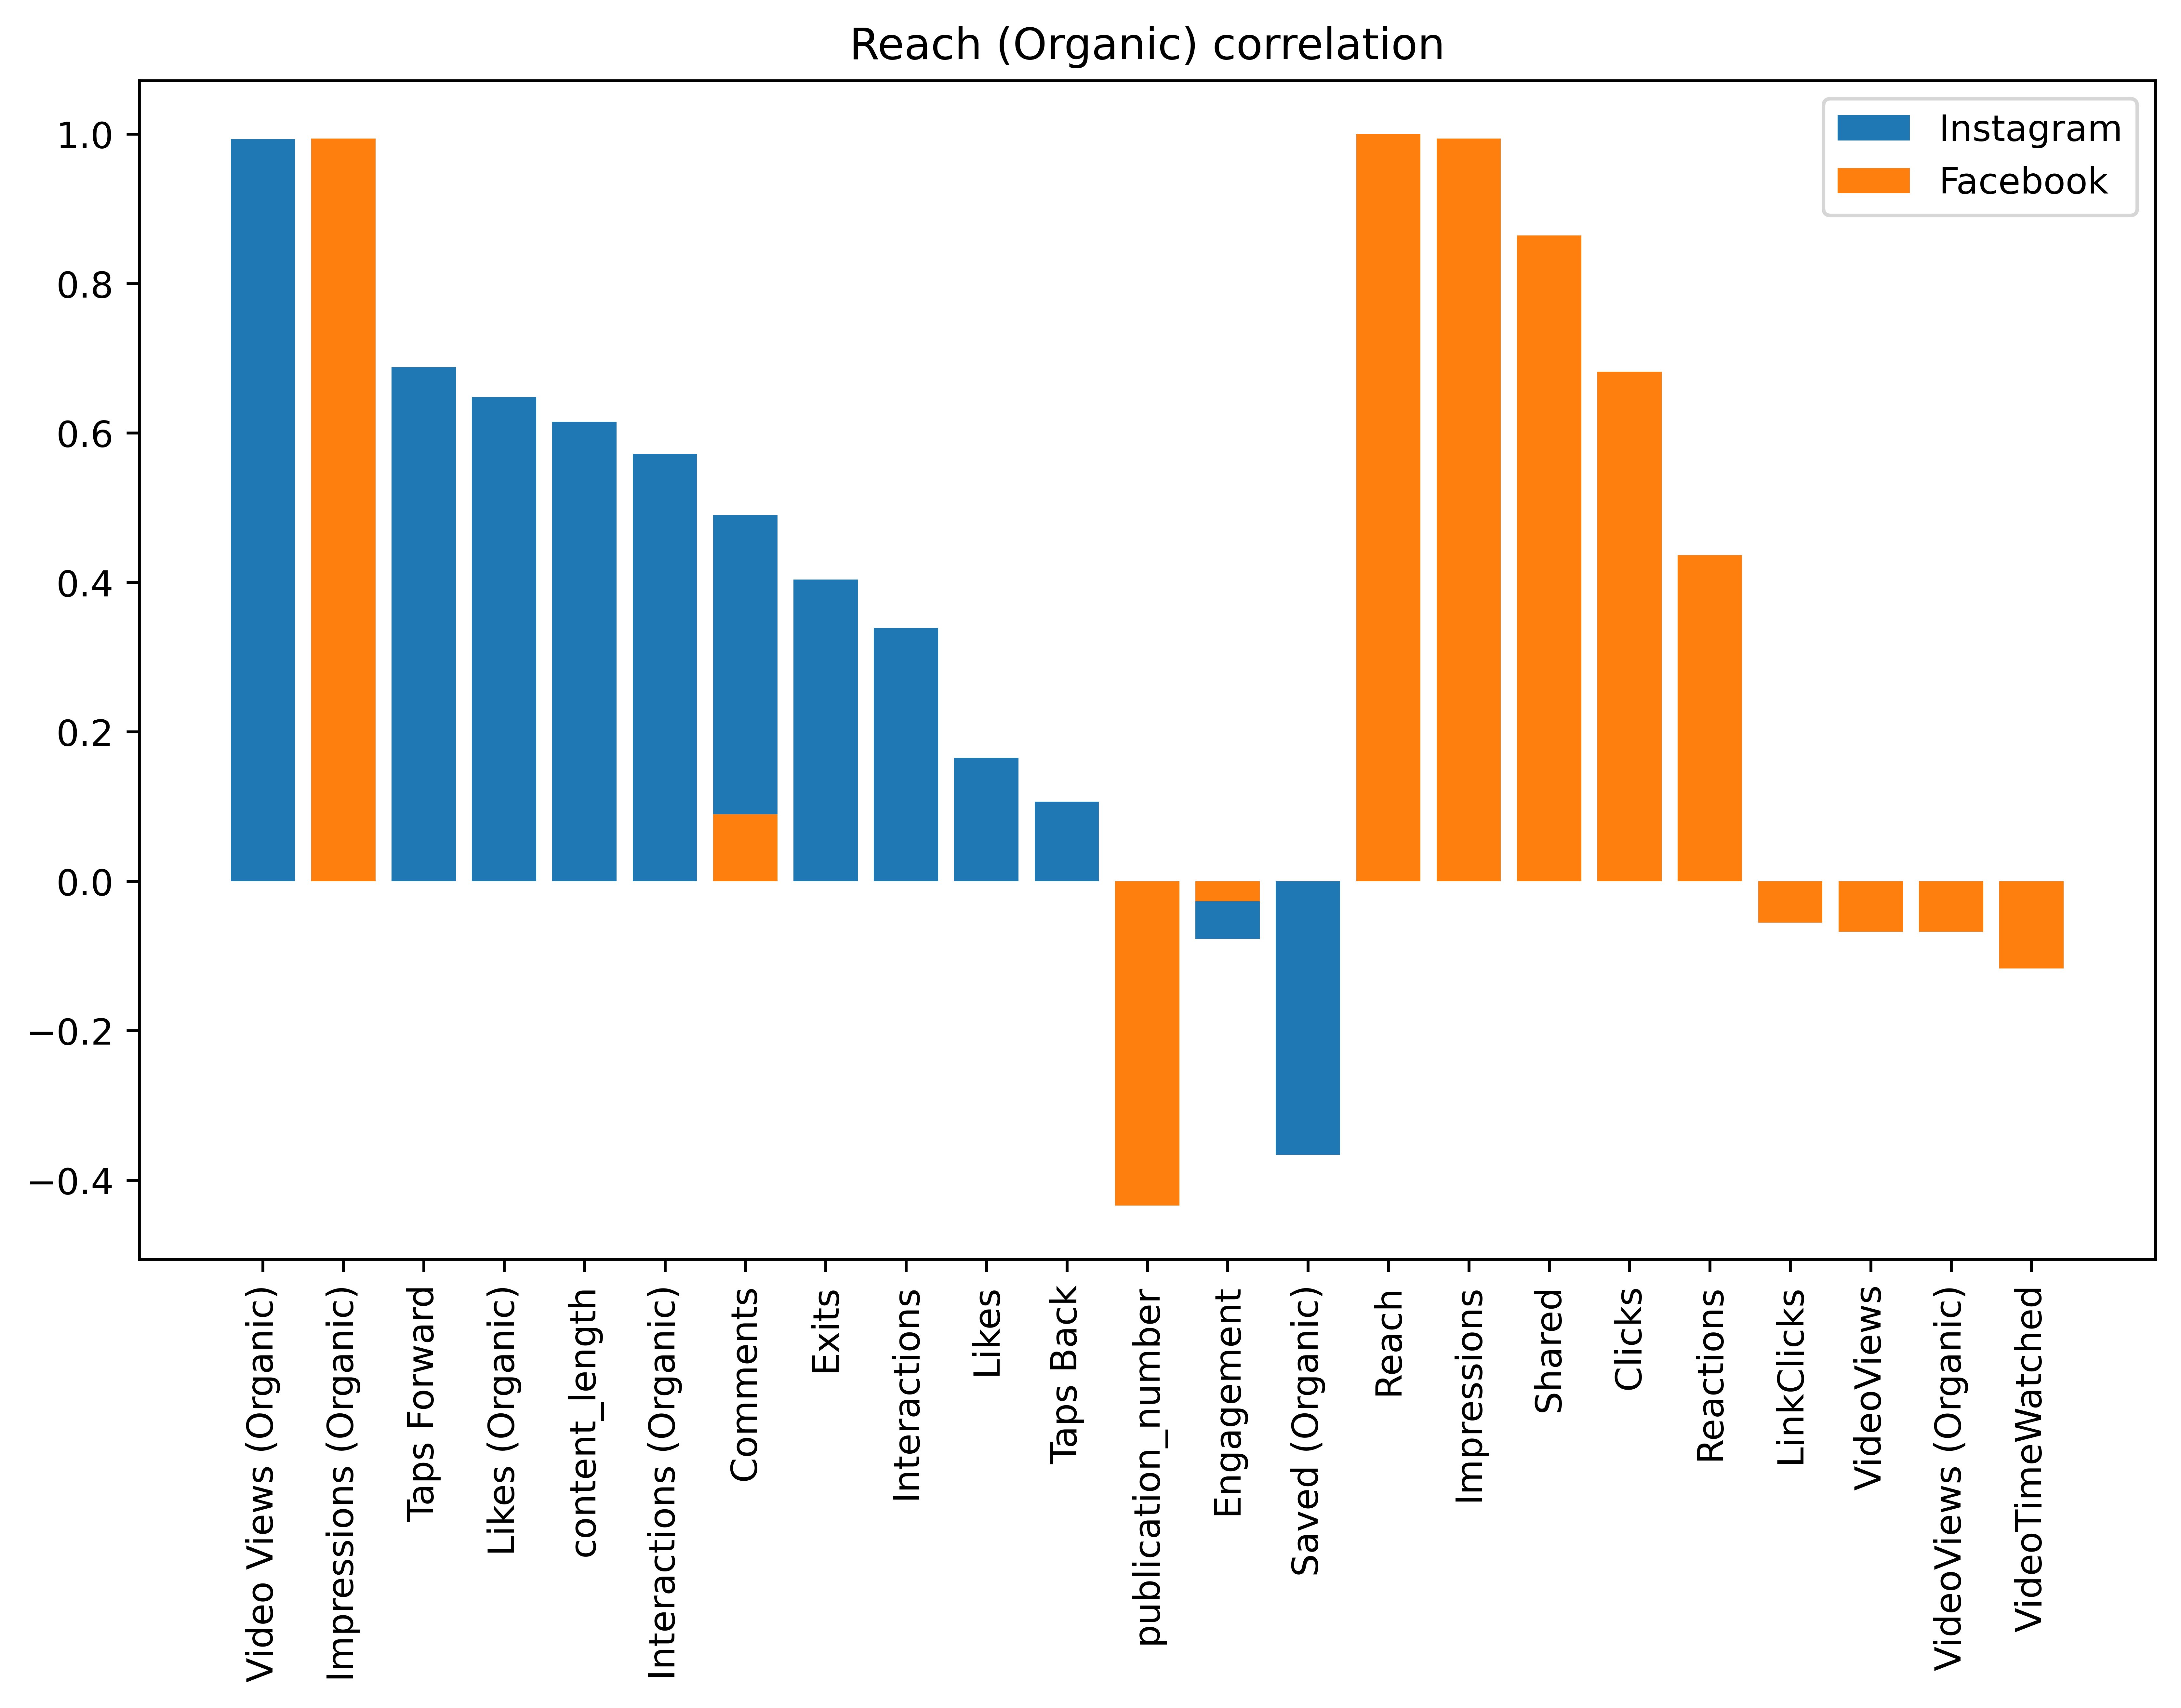

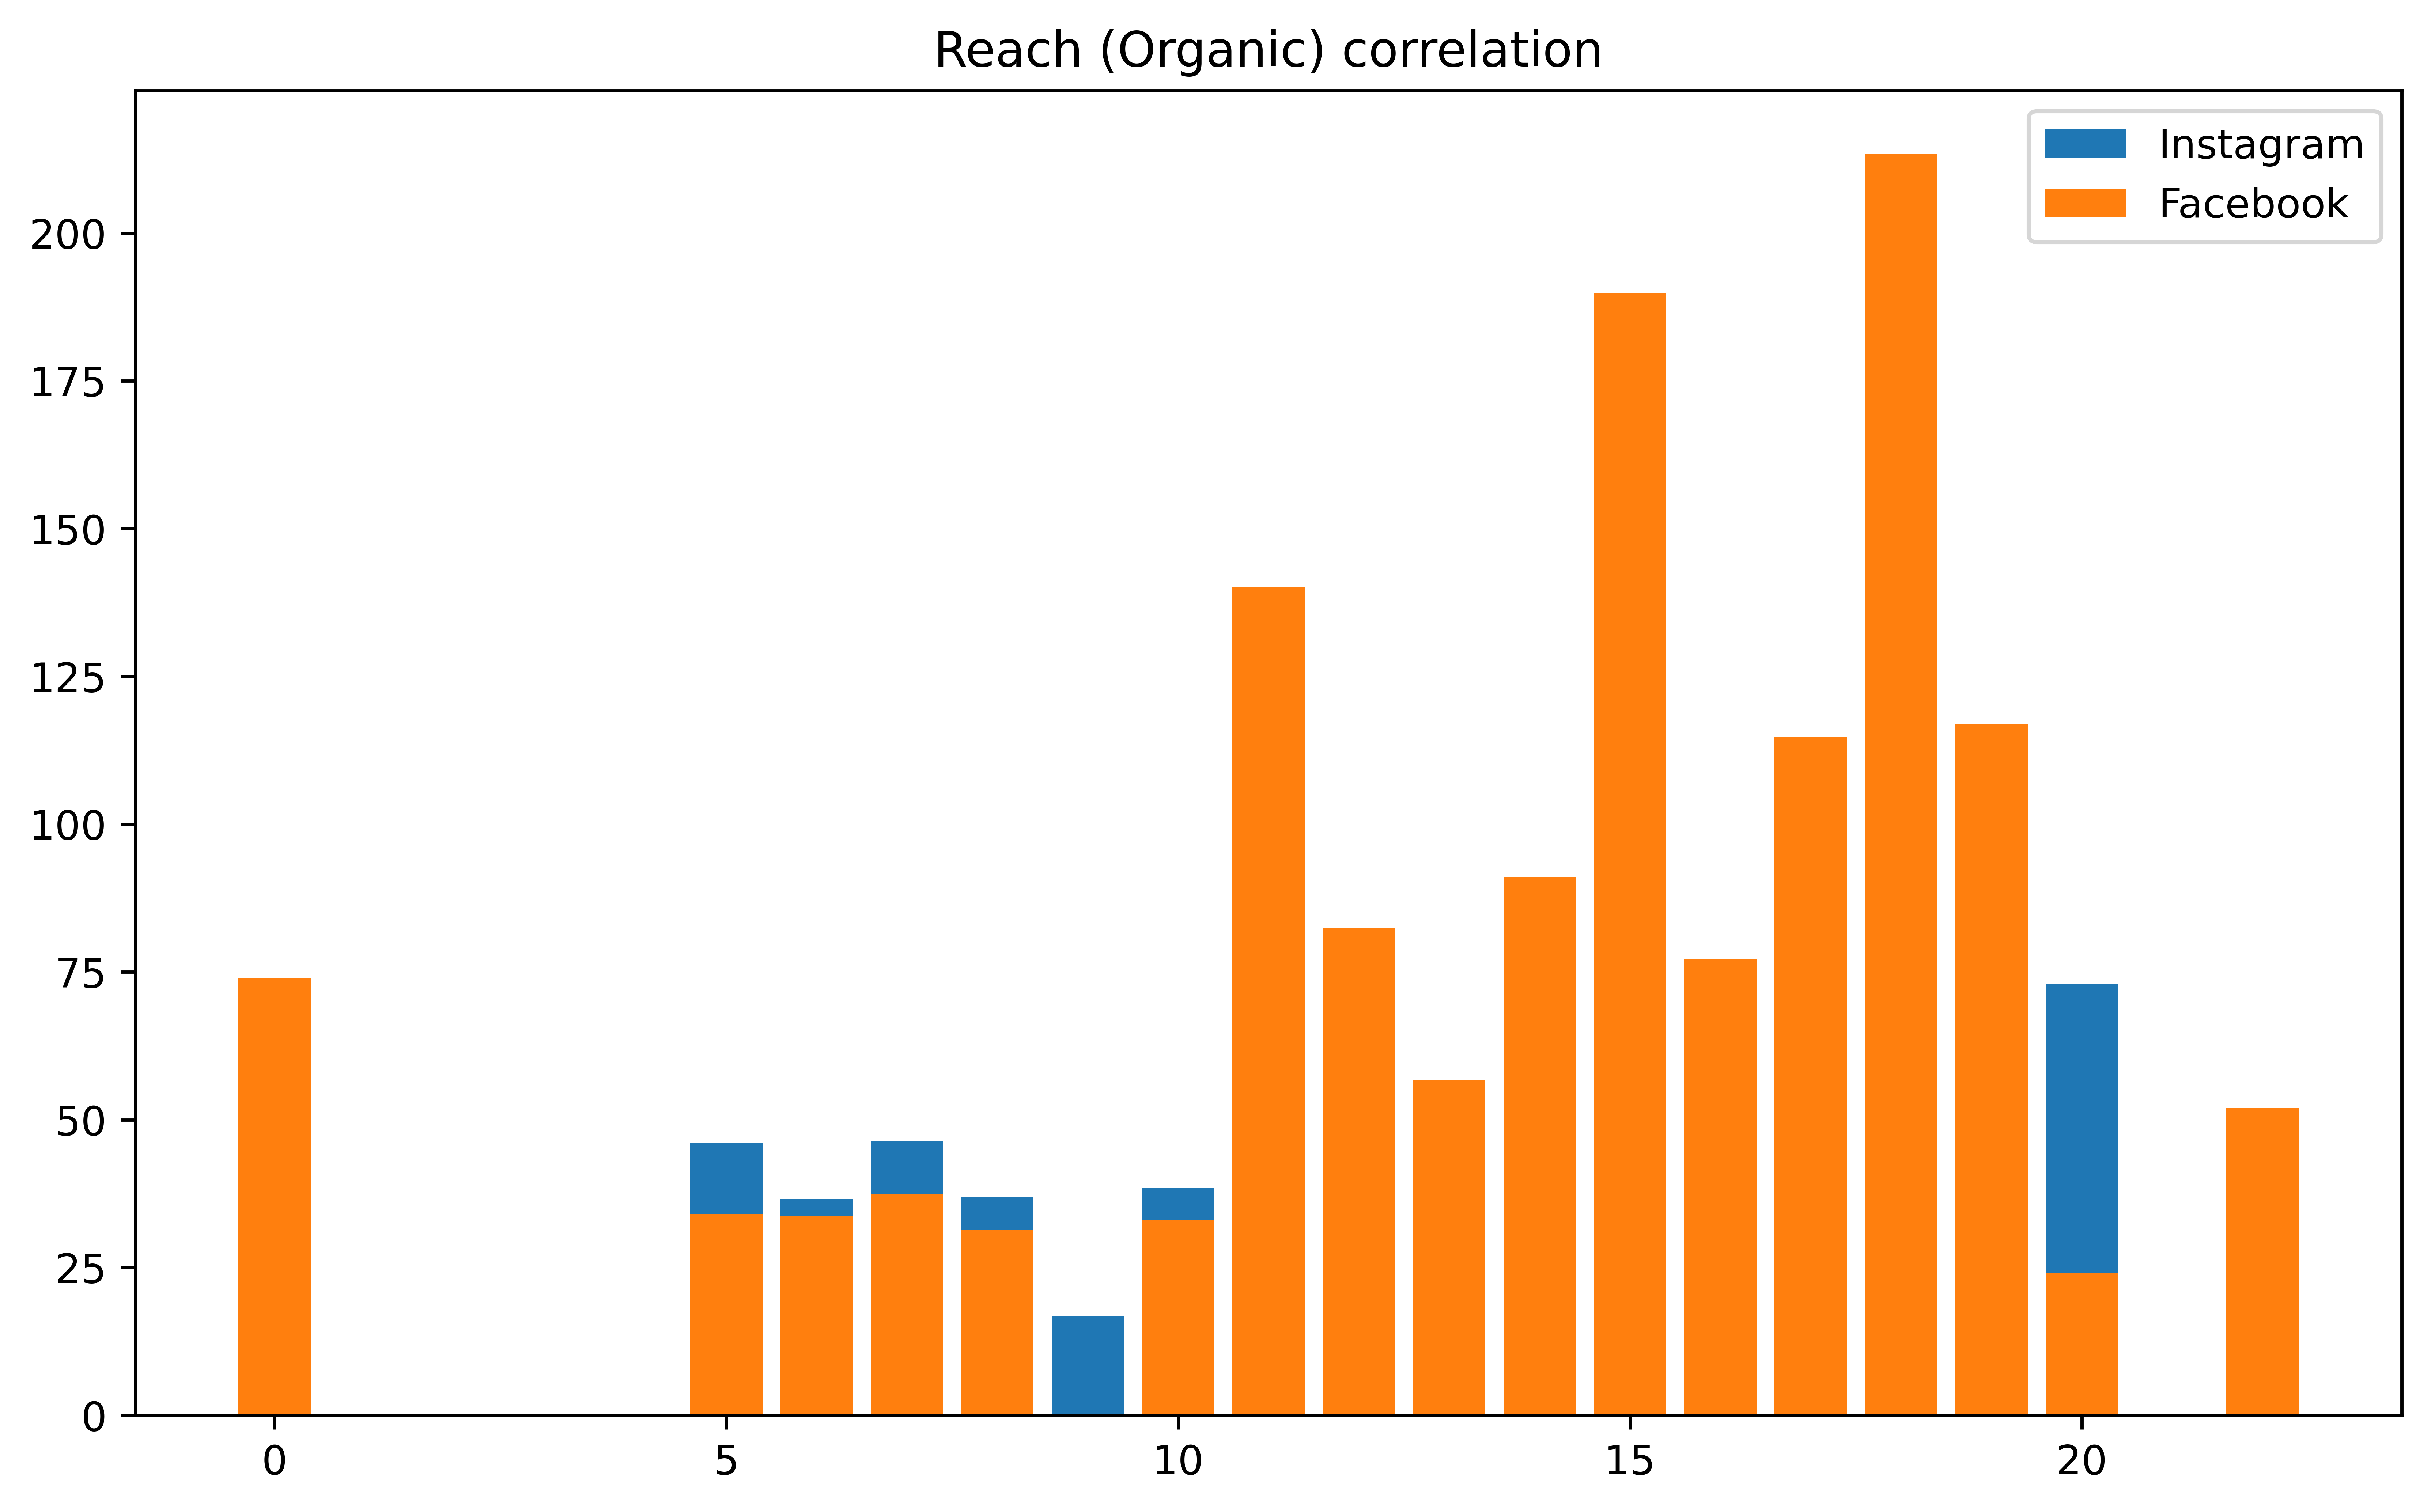

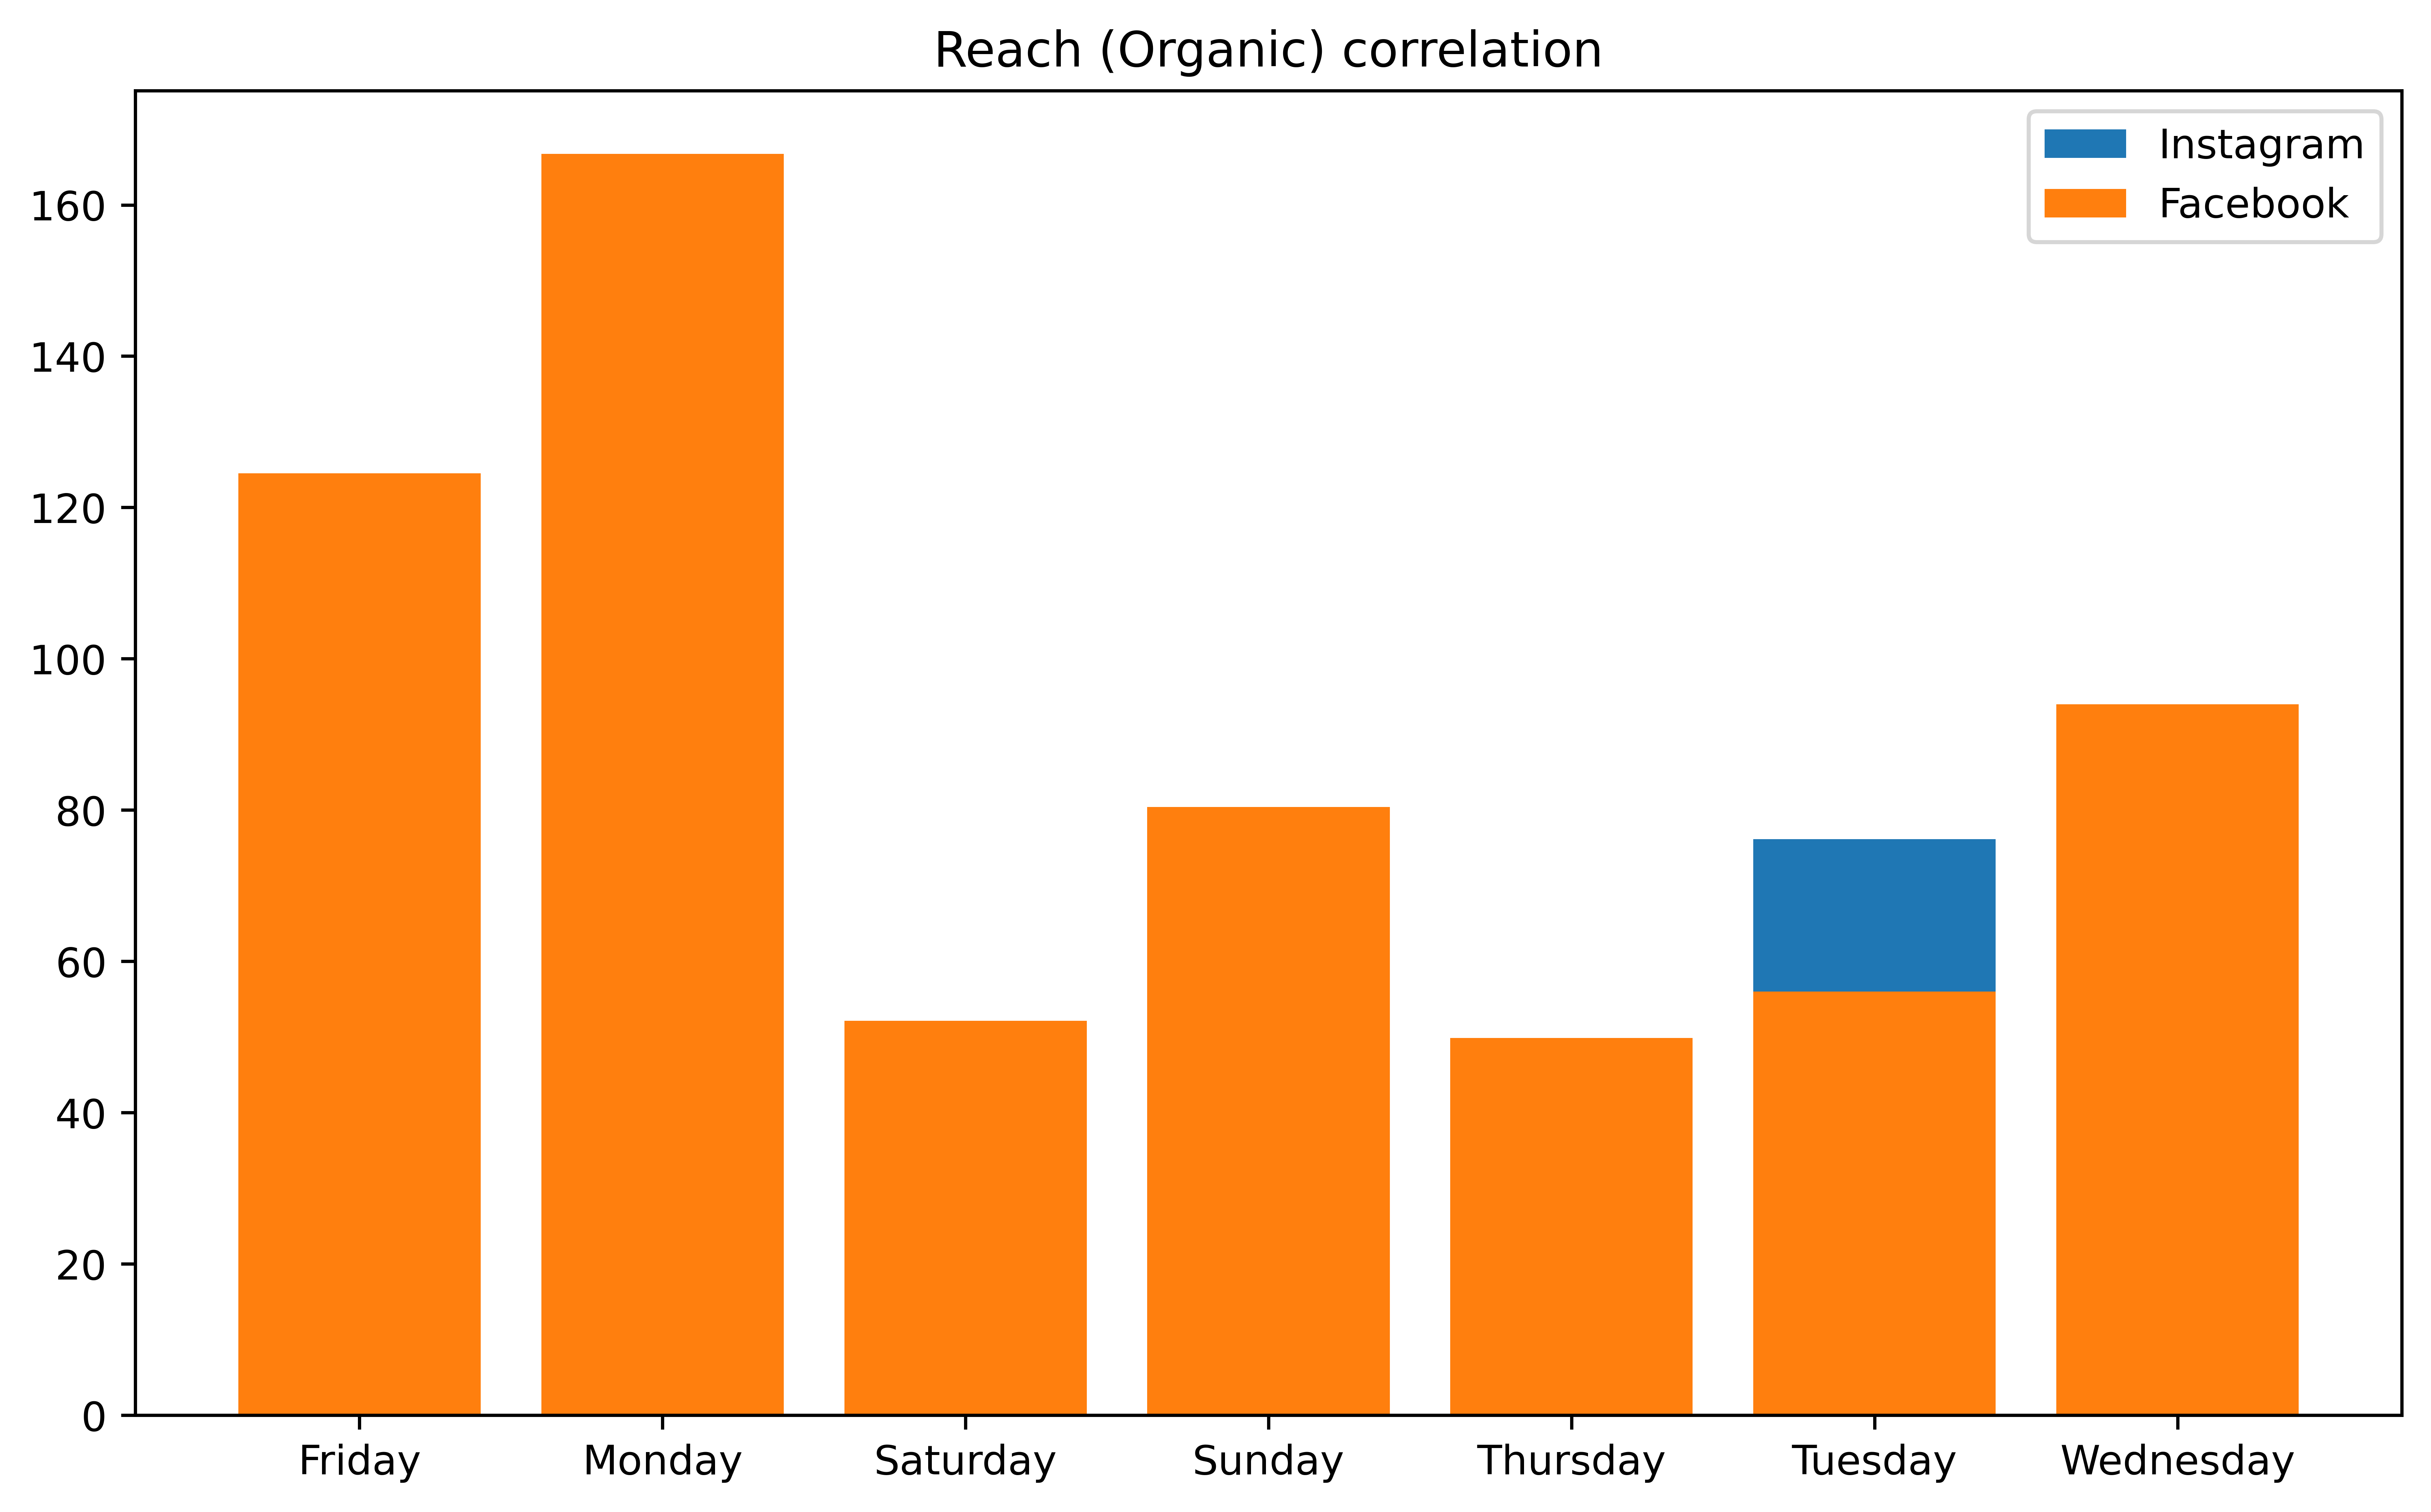

In [ ]:
# Plot different graph, allowing an analysis of the Reach during the communication campaign
plot.plot_chain(df_dict, 'Reach (Organic)', save_img_path=f'{IMG_PATH}/Reach')